# Noise Reduction by PCA
## Examples of handwriting recognition

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [3]:
noisy_digits = X + np.random.normal(0, 4, size = X.shape)

In [4]:
example_digits = noisy_digits[y==0,:][:10]
for num in range(1, 10):
    X_num = noisy_digits[y==num,:][:10]
    example_digits = np.vstack([example_digits, X_num])

example_digits.shape

(100, 64)

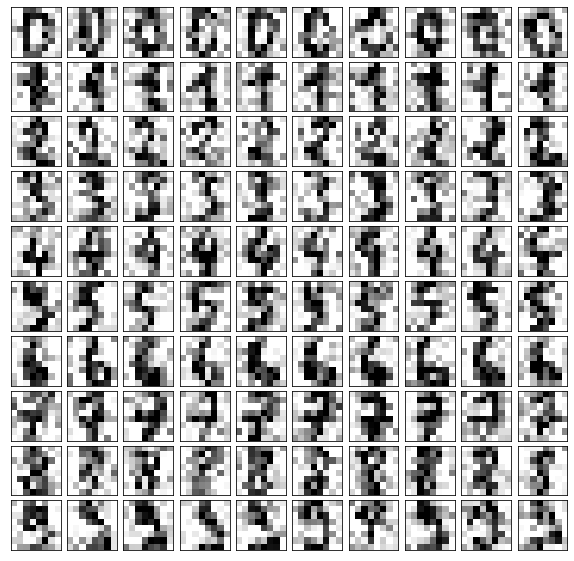

In [5]:
def plot_digits(data):
    fig, axes = plt.subplots(10, 10, figsize=(10,10),
                             subplot_kw = {'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                 cmap='binary', interpolation='nearest',
                 clim=(0, 16))

    plt.show()


plot_digits(example_digits)

In [6]:
from sklearn.decomposition import PCA

pca = PCA(0.5)
pca.fit(noisy_digits)

PCA(n_components=0.5)

In [7]:
pca.n_components_

12

In [8]:
components = pca.transform(example_digits)
filtered_digits = pca.inverse_transform(components)

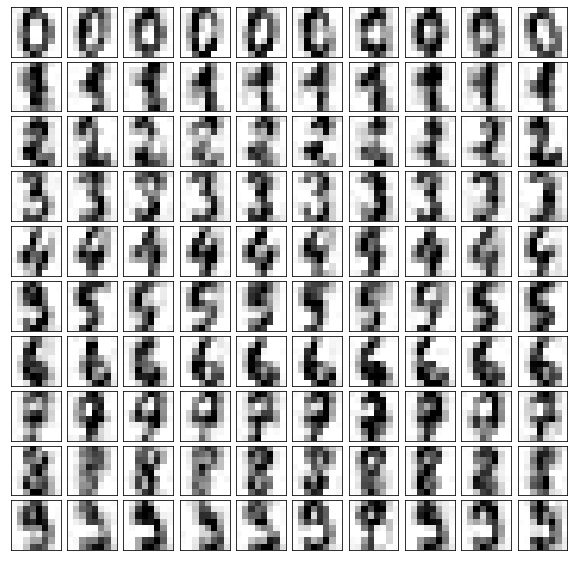

In [9]:
plot_digits(filtered_digits)

## Eigenface

In [10]:
from sklearn.datasets import fetch_lfw_people

In [11]:
faces = fetch_lfw_people()
faces.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [12]:
faces.data.shape

(13233, 2914)

In [13]:
faces.images.shape

(13233, 62, 47)

In [14]:
random_indexes = np.random.permutation(len(faces.data))
X = faces.data[random_indexes]

In [15]:
example_faces = X[:36]
example_faces.shape

(36, 2914)

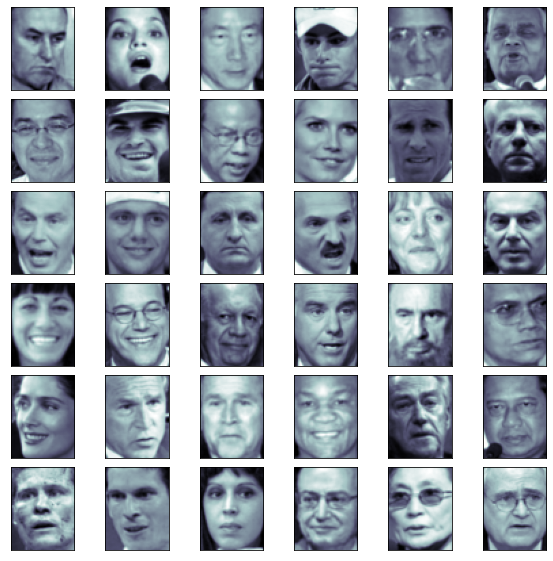

In [16]:
def plot_faces(faces):
    
    fig, axes = plt.subplots(6, 6, figsize=(10, 10),
                            subplot_kw={'xticks':[], 'yticks':[]},
                            gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(faces[i].reshape(62, 47), cmap='bone')
        
    plt.show()


plot_faces(example_faces)

In [17]:
%%time
pca = PCA(svd_solver='randomized')
pca.fit(X)

CPU times: user 1min 19s, sys: 2.42 s, total: 1min 22s
Wall time: 23.4 s


PCA(svd_solver='randomized')

In [18]:
pca.components_.shape

(2914, 2914)

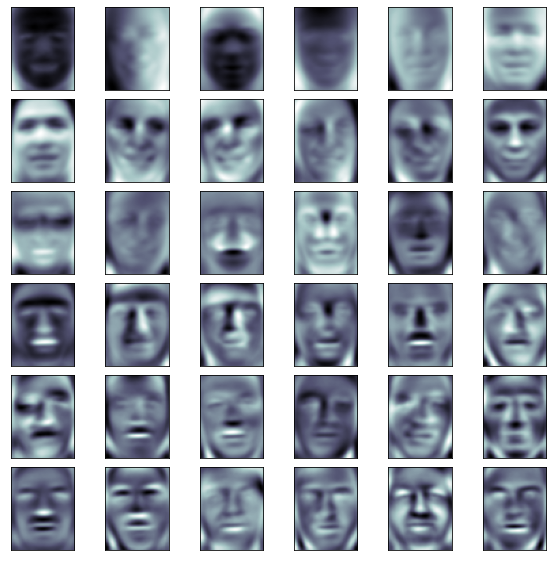

In [19]:
plot_faces(pca.components_[:36,:])

In [20]:
faces2 = fetch_lfw_people(min_faces_per_person=60)